This Jupyter notebook calculates the higher-order variance using the applied mathematics data.

Note that each (possibly normalized) image can be written as a linear combination
\begin{equation*}
\rho_B = \sum_{x=0}^h \rho_x
\end{equation*}
where $\rho_x \in \mathbb{R}^n$ is the dimension $x$ "component" of the entire persistence image.

Let $\rho_x^i$ be the $i^{th}$ entry of $\rho_x$, and let $R$ be the set of all persistence images such that $R_x$ is the set of all $x$ "components". Then define 
\begin{equation*}
\overline{\rho_k} = \frac{1}{|R|} \sum_{\rho_x \in R_x} \rho_x
\end{equation*}
as the mean $\rho_x$ image component.

The higher-order variance (up to dimension $k_{\text{max}}$) can then be defined as follows.

Results here are shown for two random variables (and homology one and two groups), but the concepts can in theory be extrapolated to more dimensions.

Consider that for random variables $X$ and $Y$, the variance
\begin{equation*}
    Var(|X-Y|) = Var(X) + Var(Y) - 2Cov(X,Y) \ .
\end{equation*}
Then, for a given network whose persistence image vector is $\rho_B$, we can split it into its homological components according to
\begin{equation*}
    \rho_B = \begin{pmatrix} \rho_{B_1} & \rho_{B_2} \end{pmatrix}^T
\end{equation*}
or the mean-shifted version
\begin{equation*}
    \hat{\rho}_B = \begin{pmatrix} \rho_{B_1} - \overline{\rho_1} & \rho_{B_2} - \overline{\rho_2} \end{pmatrix}^T
\end{equation*}
where the average image over the space of networks has been subtracted out.

Taking the variance $Var(|\rho_{B_1} - \overline{\rho_1} - \rho_{B_2} + \overline{\rho_2}|)$ results in
\begin{equation*}
    Var(\rho_{B_1} - \overline{\rho_1}) + Var(\rho_{B_2} - \overline{\rho_2}) - 2Cov(\rho_{B_1} - \overline{\rho_1}, \rho_{B_2} - \overline{\rho_1})
\end{equation*}
which has a nice interpretation as measuring the sum of the signals from each homology dimension less the correlation between them, which can help account for noisy features.

In practice, then, we compute
\begin{equation*}
    V_{k_\text{max}}(\rho_B) = \frac{1}{N-1} \sum_{i=1}^N \bigg[ (\rho_{B_1}^{(i)} - \overline{\rho_1}^{(i)})^2 + (\rho_{B_2}^{(i)} - \overline{\rho_2}^{(i)})^2 - 2(\rho_{B_1}^{(i)} - \overline{\rho_1}^{(i)})(\rho_{B_2}^{(i)} - \overline{\rho_2}^{(i)}) \bigg]
\end{equation*}



Alternatively, the higher-order variance can be defined as
\begin{equation*}
V_{k_{\text{max}}}^p(\rho_B) = \frac{\alpha_p}{k_{\text{max}}} \sum_{x=1}^{k_{\text{max}}} ||(\rho_{B_x} - \overline{\rho_x})||_p^2
\end{equation*}
where $\alpha_p$ is a scale parameter depending on the use case. This allows the user to change the Lebesgue norm on a case-by-case basis.

In [1]:
# imports, declare necessary PATH variables

import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
%run functions_for_analysis.ipynb

Applied Mathematics Data, Alternative Higher-Order Variance

In [4]:
folder_path = 'Data/data_for_demonstration/'
alpha = 1 # We can optionally choose a downscaling factor

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

indices_map = {} # Map the indicial locations on the grid to the corresponding upper and lower bound thresholds

# Note that just as in example.ipynb, we exclude the first column (or smallest lower bound) from the analysis
for i in range(len(upper_list)):
    for j in range(1,len(lower_list)):
        indices_map[upper_list[i],lower_list[j]] = (i,j)

parameter_pairs = np.array(list(itertools.product(upper_list,lower_list[1:])))

higher_order_variances = np.zeros((len(upper_list),len(lower_list)-1))

# Find the sample average dimensional vectors over the (observed) network/feature space
mu_R1 = np.zeros((20*20))
mu_R2 = np.zeros((20*20))
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    mu_R1 = mu_R1 + r1
    mu_R2 = mu_R2 + r2
mu_R1 = mu_R1 / len(parameter_pairs)
mu_R2 = mu_R2 / len(parameter_pairs)

# Calculate the higher order variance of each observed network in the sample
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    higher_order_variances[i,j-1] = (np.linalg.norm(alpha*(r1-mu_R1))**2 + np.linalg.norm(alpha*(r2-mu_R2))**2) / (2*(400-1))

We can plot the higher-order variances along with the optimal choices from example.ipynb

/tmp/ipykernel_4645/717416739.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(lower_list,1))


Text(0.5, 1.0, 'Higher-Order Variance $V_2^2(\\mathcal{N})$')

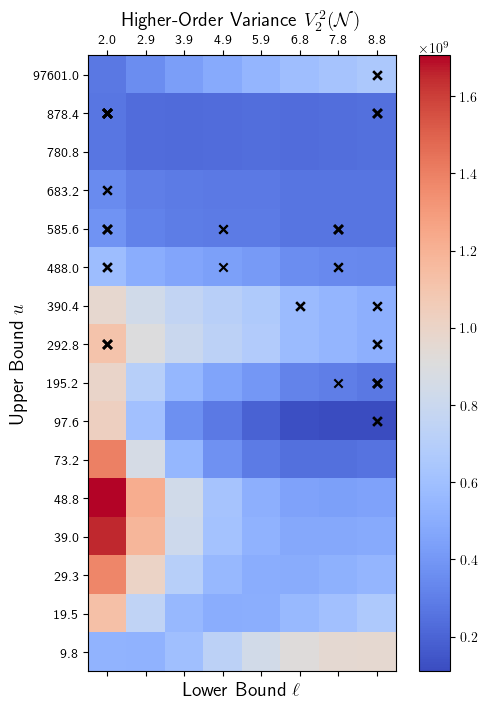

In [ ]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['text.usetex'] = True


fig,ax = plt.subplots(figsize=(6,8))

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

c = ax.matshow(higher_order_variances[::-1,:], cmap='coolwarm')
ax.set_xticklabels(np.round(lower_list,1))
ax.set_yticks(np.arange(0,16))
ax.set_yticklabels(np.round(upper_list[::-1],1))
ax.set_xlabel(r'Lower Bound $\ell$')
ax.set_ylabel(r'Upper Bound $u$')

optimal_indices = [[15, 8], [15, 8], [15, 8], [15, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [10, 7], [9, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [8, 8], [8, 8], [8, 8], [8, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [7, 7], [11, 4], [11, 4], [10, 4], [10, 1], [6, 8], [6, 8], [6, 8], [6, 8], [6, 8], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [10, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1]]
for index in optimal_indices:
    ax.scatter(index[1]-1,15-index[0],color='black', marker='x')

fig.colorbar(c)

ax.set_title(r'Higher-Order Variance $V_2^2(\mathcal{N})$')

Applied Mathematics Data, Original Higher-Order Variance

In [6]:
folder_path = 'Data/data_for_demonstration/'
alpha = 1

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

indices_map = {} # Map the indicial locations on the grid to the corresponding upper and lower bound thresholds

# Note that just as in example.ipynb, we exclude the first column (or smallest lower bound) from the analysis
for i in range(len(upper_list)):
    for j in range(1,len(lower_list)):
        indices_map[upper_list[i],lower_list[j]] = (i,j)

parameter_pairs = np.array(list(itertools.product(upper_list,lower_list[1:])))

higher_order_variances = np.zeros((len(upper_list),len(lower_list)-1))

# Find the sample average dimensional vectors over the (observed) network/feature space
mu_R1 = np.zeros((20*20))
mu_R2 = np.zeros((20*20))
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    mu_R1 = mu_R1 + r1
    mu_R2 = mu_R2 + r2
mu_R1 = mu_R1 / len(parameter_pairs)
mu_R2 = mu_R2 / len(parameter_pairs)

# Calculate the higher order variance of each observed network in the sample
for pair in parameter_pairs:
    (i,j) = indices_map[pair[0],pair[1]]
    r1, r2 = get_dim_components(folder_path + str((j,i)) + ".csv")
    cov_mat = np.cov(r1,r2)
    higher_order_variances[i,j-1] = cov_mat[0,0] + cov_mat[1,1] - 2*cov_mat[0,1]

/tmp/ipykernel_4645/442517300.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(lower_list,1))


Text(0.5, 1.0, 'Higher-Order Variance $V_2(\\mathcal{X})$')

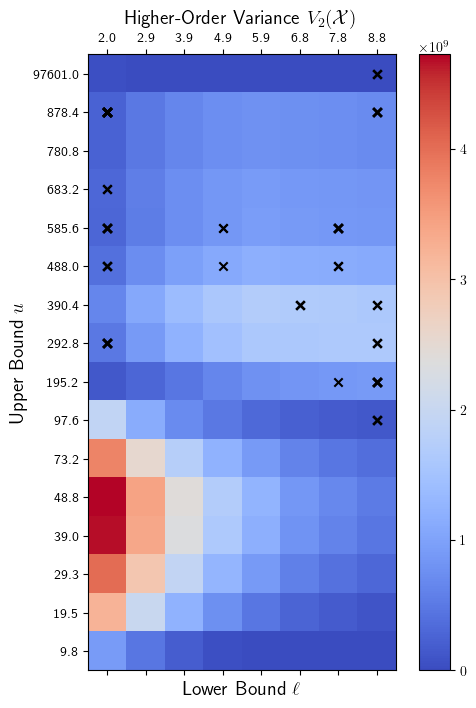

In [7]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['text.usetex'] = True


fig,ax = plt.subplots(figsize=(6,8))

upper_list =  np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00075, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 1])*97601
lower_list = np.array([1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05])*97601

c = ax.matshow(higher_order_variances[::-1,:], cmap='coolwarm')
ax.set_xticklabels(np.round(lower_list,1))
ax.set_yticks(np.arange(0,16))
ax.set_yticklabels(np.round(upper_list[::-1],1))
ax.set_xlabel(r'Lower Bound $\ell$')
ax.set_ylabel(r'Upper Bound $u$')

optimal_indices = [[15, 8], [15, 8], [15, 8], [15, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [14, 8], [11, 7], [10, 7], [9, 8], [9, 6], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [11, 7], [10, 7], [9, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [8, 8], [8, 8], [8, 8], [8, 8], [9, 6], [7, 8], [7, 8], [7, 8], [7, 8], [7, 8], [7, 7], [11, 4], [11, 4], [10, 4], [10, 1], [6, 8], [6, 8], [6, 8], [6, 8], [6, 8], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [14, 1], [12, 1], [10, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [11, 1], [10, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1], [8, 1]]
for index in optimal_indices:
    ax.scatter(index[1]-1,15-index[0],color='black', marker='x')

fig.colorbar(c)

ax.set_title(r'Higher-Order Variance $V_2(\mathcal{X})$')